In [1]:
import numpy as np
import pandas as pd
import requests
import keras
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import random
import calendar
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest
%matplotlib inline  

Using TensorFlow backend.


# Data Set

In [24]:
features = ['Age', 'g', 'S%',
       'm', 'p', '3', 'r', 'a', 's', 'b', 'fg%', 'fga', 'ft%', 'fta', 'to',
       '3%', '3a', '2%', '2a', 'adjfg%', 'dr', 'or', '2d', '3d', 'fg',
       'fgm', 'pf', 'ft', 'ftm', '3m', '2', 'ato', 'a+to', 'netft', 'to48',
       '3s48', 'dpg', 'ppg', 'g.1', 's+b', 'p48', 'str', 'a-to', 'tech',
       '3a/fga', 'ts%', 'USG', 'pV', '3V', 'rV', 'aV', 'sV', 'bV', 'fg%V',
       'ft%V', 'toV', '3%V', '2%V', 'adjfg%V', 'drV', 'orV', '2dV', '3dV',
       'fgV', 'fgaV', 'fgmV', 'pfV', 'ftV', 'ftaV', 'ftmV', 'mV', '3aV',
       '3mV', '2V', '2aV', 'atoV', 'netftV', 'to48V', '3s48V', 'dpgV',
       'ppgV', 's+bV', 'p48V', 'strV', 'a-toV', 'techV', '3a/fgaV', 'ts%V',
       'p_Normalized', 'a_Normalized', '3_Normalized', 'r_Normalized',
       's_Normalized', 'b_Normalized', 'to_Normalized', 'fg%_Normalized',
       'ft%_Normalized', 'fta_Normalized', 'normalized_score']


rankings = ['Y!Adp9', 'CBSAdp', 'CBSRank',
       'FanTraxADP', 'Y!ORank', 'Y!Avg$', 'Y!Proj$', 'NBA Salary',
       'ESPNAdp8', 'ESPNRank', 'ESPN$', 'ESPNProj$', 'Y!%', 'Value', 'Name', 'normalized_score']

y = 'normalized_score'

player_stats_by_year = []
for year in range(2010, 2016):
    if(year != 2017):
        thisYear = pd.read_csv('new_normalized_monster_players_with_ranks_'+str(year)+".xls")
        nextYear = pd.read_csv('new_normalized_monster_players_with_ranks_'+str(year+1)+".xls")
        scores_next_year = nextYear[['Name', y]]
        renamed_scores = scores_next_year.rename(index=str, columns={y: "y"})
        merged = pd.merge(thisYear, renamed_scores, on='Name')
        years = [year+1] * merged.shape[0]
        merged['year'] = years
        player_stats_by_year.append(merged)
all_player_data = pd.concat(player_stats_by_year)
X = all_player_data.drop('y', axis=1)
y = all_player_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_features = X_train[features]
X_test_features = X_test[features]

# Train Linear Regression

In [25]:
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train_features,y_train)
y_pred = [lr.predict([row]) for label,row in X_test_features.iterrows()]
print(mean_squared_error(y_test, y_pred))

0.347708607829


# Run Linear Regression

In [26]:
players_2017 = pd.read_csv('new_normalized_monster_players_with_ranks_2017.xls')
players = players_2017.Name
X_2017 = players_2017[features]
y_pred = [lr.predict([row])[0] for label,row in X_2017.iterrows()]
pred_2017 = pd.concat([players,pd.Series(y_pred, name="score")], axis=1)
pred_2017.sort_values(by=['score'], ascending=False)


,Name,score
1,James Harden,6.938284
4,Russell Westbrook,6.560171
2,Stephen Curry,5.222643
5,Kawhi Leonard,4.770594
0,Kevin Durant,4.653269
8,Isaiah Thomas,4.447138
9,LeBron James,4.430235
6,Giannis Antetokounmpo,4.407482
10,Kyle Lowry,4.371840
136,Joel Embiid,4.160760


# Linear Regression Plot By Increasing Data

[(12, 0.61956147538910711), (11, 0.539907295939002), (10, 0.62793652100410824), (9, 0.60473770793346771), (8, 0.61307227110657025), (7, 0.57850565975327795), (6, 0.62733272506176097), (5, 0.60392691853354652), (4, 0.62904440580230314), (3, 0.86224175901321831), (2, 0.73974013713303388), (1, 0.96997476146931016)]


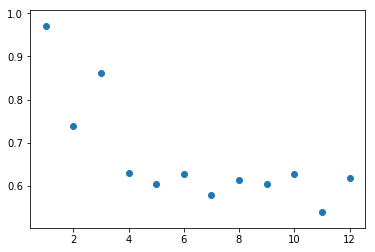

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


features = ['Age', 'g', 'S%',
       'm', 'p', '3', 'r', 'a', 's', 'b', 'fg%', 'fga', 'ft%', 'fta', 'to',
       '3%', '3a', '2%', '2a', 'adjfg%', 'dr', 'or', '2d', '3d', 'fg',
       'fgm', 'pf', 'ft', 'ftm', '3m', '2', 'ato', 'a+to', 'netft', 'to48',
       '3s48', 'dpg', 'ppg', 'g.1', 's+b', 'p48', 'str', 'a-to', 'tech',
       '3a/fga', 'ts%', 'USG', 'pV', '3V', 'rV', 'aV', 'sV', 'bV', 'fg%V',
       'ft%V', 'toV', '3%V', '2%V', 'adjfg%V', 'drV', 'orV', '2dV', '3dV',
       'fgV', 'fgaV', 'fgmV', 'pfV', 'ftV', 'ftaV', 'ftmV', 'mV', '3aV',
       '3mV', '2V', '2aV', 'atoV', 'netftV', 'to48V', '3s48V', 'dpgV',
       'ppgV', 's+bV', 'p48V', 'strV', 'a-toV', 'techV', '3a/fgaV', 'ts%V',
       'p_Normalized', 'a_Normalized', '3_Normalized', 'r_Normalized',
       's_Normalized', 'b_Normalized', 'to_Normalized', 'fg%_Normalized',
       'ft%_Normalized', 'fta_Normalized', 'normalized_score']


rankings = ['Y!Adp9', 'CBSAdp', 'CBSRank',
       'FanTraxADP', 'Y!ORank', 'Y!Avg$', 'Y!Proj$', 'NBA Salary',
       'ESPNAdp8', 'ESPNRank', 'ESPN$', 'ESPNProj$', 'Y!%', 'Value', 'Name', 'normalized_score']

y_target = 'normalized_score'

ranges = [range(x, 2016) for x in range(2004, 2016)]
error = []
for aRange in ranges:
    player_stats_by_year = []
    for year in aRange:
        thisYear = pd.read_csv('normalized_monster_players_with_ranks_'+str(year)+".xls")
        nextYear = pd.read_csv('normalized_monster_players_with_ranks_'+str(year+1)+".xls")
        scores_next_year = nextYear[['Name', y_target]]
        renamed_scores = scores_next_year.rename(index=str, columns={y_target: "y"})
        merged = pd.merge(thisYear, renamed_scores, on='Name')
        years = [year+1] * merged.shape[0]
        merged['year'] = years
        player_stats_by_year.append(merged)
    all_player_data = pd.concat(player_stats_by_year)
    lr = LinearRegression(n_jobs=-1)
    X = all_player_data
    y = all_player_data['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    X_train_features = X_train[features]
    X_test_features = X_test[features]
    lr.fit(X_train_features,y_train)
    y_pred = [lr.predict([row]) for label,row in X_test_features.iterrows()]
    mse = mean_squared_error(y_test, y_pred)
    error.append((len(aRange), mse))
iters = zip(*error)[0]
mse = zip(*error)[1]
print(error)
plt.scatter(x=iters, y=mse)

# Feature selection - show features with lowest p values

In [ ]:
sb = SelectKBest()
sb.fit(X[features].as_matrix(), np.array(y))
scores = zip(sb.pvalues_, features)
scores.sort(key=lambda tup: tup[0])
scores

# Basic Neural Net

In [6]:
import numpy
import pandas
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model

inputs = Input(shape=(99,))
hidden1 = Dense(10,init='normal', activation='relu')(inputs)
predictions = Dense(1, init='normal')(hidden1)
model = Model(input=inputs, output=predictions)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X[features].as_matrix(), y,
          nb_epoch=20,
          validation_split=.15)

y_pred = [model.predict(np.array(row).reshape(1, 99))[0][0] for label,row in X_test_features.iterrows()]
mean_squared_error(y_test, y_pred)

/Users/benjaminsmith/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="normal")`
/Users/benjaminsmith/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`
/Users/benjaminsmith/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
/Users/benjaminsmith/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 328 samples, validate on 59 samples
Epoch 1/20
328/328 [==============================] - 0s - loss: 25.7102 - val_loss: 3.7129
Epoch 2/20
328/328 [==============================] - 0s - loss: 8.5879 - val_loss: 3.2557
Epoch 3/20
328/328 [==============================] - 0s - loss: 2.4015 - val_loss: 2.4537
Epoch 4/20
328/328 [==============================] - 0s - loss: 2.1352 - val_loss: 2.4446
Epoch 5/20
328/328 [==============================] - 0s - loss: 1.4721 - val_loss: 2.5704
Epoch 6/20
328/328 [==============================] - 0s - loss: 1.4326 - val_loss: 2.4704
Epoch 7/20
328/328 [==============================] - 0s - loss: 1.2083 - val_loss: 2.3195

1.4122353586194696

# Train Neural Net on Increasing Data w/ Plot

In [ ]:
import numpy
import pandas
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model


ranges = [range(x, 2016) for x in range(2004, 2016)]
error = []
for aRange in ranges:
    player_stats_by_year = []
    for year in aRange:
        thisYear = pd.read_csv('normalized_monster_players_with_ranks_'+str(year)+".xls")
        nextYear = pd.read_csv('normalized_monster_players_with_ranks_'+str(year+1)+".xls")
        scores_next_year = nextYear[['Name', y_target]]
        renamed_scores = scores_next_year.rename(index=str, columns={y_target: "y"})
        merged = pd.merge(thisYear, renamed_scores, on='Name')
        years = [year+1] * merged.shape[0]
        merged['year'] = years
        player_stats_by_year.append(merged)
    all_player_data = pd.concat(player_stats_by_year)
    X = all_player_data
    y = all_player_data['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    X_train_features = X_train[features]
    X_test_features = X_test[features]
    inputs = Input(shape=(shape,))
    hidden1 = Dense(10,init='normal', activation='relu')(inputs)
    predictions = Dense(1, init='normal')(hidden1)
    model = Model(input=inputs, output=predictions)
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X[features].as_matrix(), y,
              nb_epoch=10,
              validation_split=.15)
    y_pred = [model.predict(np.array(row).reshape(1, 99))[0][0] for label,row in X_test_features.iterrows()]
    mse = mean_squared_error(y_test, y_pred)
    error.append((len(aRange), mse))
iters = zip(*error)[0]
mse_2 = zip(*error)[1]
plt.scatter(x=iters, y=mse2)

# Denser Neural Net

In [27]:
import numpy
import pandas
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model

inputs = Input(shape=(99,))
hidden1 = Dense(10,init='normal', activation='relu')(inputs)
hidden2 = Dense(10,init='normal', activation='relu')(hidden1)
hidden3 = Dense(10,init='normal', activation='linear')(hidden2)
predictions = Dense(1, init='normal')(hidden3)
model = Model(input=inputs, output=predictions)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_features.as_matrix(), y_train,
          nb_epoch=10,
          validation_split=.15)

y_pred = [model.predict(np.array(row).reshape(1, 99))[0][0] for label,row in X_test_features.iterrows()]
mean_squared_error(y_test, y_pred)

/Users/benjaminsmith/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="normal")`
/Users/benjaminsmith/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="normal")`
/Users/benjaminsmith/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="linear", kernel_initializer="normal")`
/Users/benjaminsmith/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`
/Users/benjaminsmith/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
/Users/benja

Train on 1430 samples, validate on 253 samples
Epoch 1/10
1430/1430 [==============================] - 0s - loss: 6.9291 - val_loss: 1.8563
Epoch 2/10
1430/1430 [==============================] - 0s - loss: 1.9411 - val_loss: 1.5979
Epoch 3/10
1430/1430 [==============================] - 0s - loss: 1.5392 - val_loss: 1.1345
Epoch 4/10
1430/1430 [===================

0.49781305848831481

# Running Neural Net

In [9]:
all_data = pd.read_csv('normalized_monster_players_with_ranks_2017.xls')
players = all_data.Name
X = all_data[features]
y_pred = [model.predict(np.array(row).reshape(1, 99))[0][0] for label,row in X.iterrows()]
pred_2017 = pd.concat([players,pd.Series(y_pred, name="score")], axis=1)
pred_2017.sort_values(by=['score'], ascending=False)

,Name,score
4,Russell Westbrook,4.860178
1,James Harden,4.657783
14,DeMarcus Cousins,4.217255
3,Anthony Davis,4.140568
8,Isaiah Thomas,4.047606
51,Andrew Wiggins,4.010094
7,Karl-Anthony Towns,3.955712
20,John Wall,3.951056
0,Kevin Durant,3.916988
35,Carmelo Anthony,3.863462
